In [8]:
import pandas as pd #Cleaning + Loading data
import numpy as np #Cleaning + Loading data
import matplotlib.pyplot as plt 
import seaborn as sns #visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #ML
import warnings #Avoid clutter
warnings.filterwarnings('ignore')






In [30]:
def load_and_explore_data(train_path, test_path):
    """
    Load the dataset, perform initial exploration, and get basic information about the telecom churn dataset.
    """
    df_train =  pd.read_csv(train_path)
    df_test =  pd.read_csv(test_path) #Load in the datasets(Pre split into training data and testing data)

    #Print Basic Information on the Dataset
    print("\n=== Dataset Overview ===")
    print(f"Number of records(rows) in training set {len(df_train)}")
    print(f"Number of records(rows) in testing set {len(df_test)}")
    print(f"Number of features(columns) {len(df_train.columns)}")
    print("\n=== Missing Values ===")
    print(df_train.isnull().sum()[df_train.isnull().sum() > 0]) # Identify only those columns with missing values

    #Get basic Churn distribution(in training set)
    print("\n=== Churn Distribution ===")
    churn_dist = df_train['Churn'].value_counts(normalize=True) # Take the value counts, then convert them into a percentage of the total set
    print(churn_dist)

    #Plots for Basic Churn comparison between Training and Testing Data
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    
    test_churn = df_test['Churn'].value_counts(normalize=True)

    x = np.arange(2) #Creating an Array [0,1] for representing the positions of the 2 churn categories on the x axis
    width = 0.40

    plt.bar(x - width/2, churn_dist, width, label='Train') #Shift training bar left with -
    plt.bar(x + width/2, test_churn, width, label='Test') #Shift testing bar right with +
    plt.xticks(x,['Not Churned', 'Churned']) #Set x axis labels at the array positions [0,1]
    plt.legend() #Show which bar is for which
            

    #Plot for numerical correlation
    plt.subplot(122)
    numerical_cols = df_train.select_dtypes(include=['int64','float64']).columns #Filter to only Numerical columns using float and int.
    correlation = df_train[numerical_cols].corr() #Find the correlation in these numerical columns using .corr()
    sns.heatmap(correlation, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')

    plt.tight_layout() # Adjust subplot parameters for a clean layout
    plt.show() #Render and show plots.

    return df_train, df_test

In [11]:
def prepare_features(df_train, df_test):
    """
    Prepare features for modeling using my presplit train and test sets
    """
    # Separate the features and target for both training and testing sets
    X_train = df_train.drop('Churn', axis=1)
    y_train = df_train['Churn']
    
    X_test = df_test.drop('Churn', axis=1)
    y_test = df_test['Churn']
    
    # Handle categorical variables
    categorical_cols = X_train.select_dtypes(include=['object']).columns #not numeric
    
    # Important: Fit get_dummies on training data only
    X_train = pd.get_dummies(X_train, columns=categorical_cols) #initially starting with One hot encoding to get a basic outline
    # Use the same columns for test set
    X_test = pd.get_dummies(X_test, columns=categorical_cols)
    
    # Ensure test set has same columns as train set
    missing_cols = set(X_train.columns) - set(X_test.columns) #check which columns test doesnt have
    for col in missing_cols:
        X_test[col] = 0
    X_test = X_test[X_train.columns] #Add these and rearrange the test columns to match the training columns
    
    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]) #Standardize the mean and sd to ensure numerical features are on the same scale
    
    print("\n=== Data Split Information ===") #basic data set info
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
    
    return X_train, X_test, y_train, y_test

In [12]:
def generate_basic_eda_report(df_train, df_test):
    """
    Make a basic Eda report
    """
    print("\n=== EDA Report ===")
    
    # Basic statistics 
    print("\nTraining Set - Numerical Features Summary:")
    print(df_train.describe())
    print("\nTesting Set - Numerical Features Summary:")
    print(df_test.describe())
    
    # Analyzing the categorical features
    categorical_cols = df_train.select_dtypes(include=['object']).columns #usually string
    print("\nTraining Set - Categorical Features Summary:")
    for col in categorical_cols:
        print(f"\n{col} value counts:")
        print(df_train[col].value_counts().head()) #first five for just insight
        print(f"{col} unique values:", df_train[col].nunique()) #Number of unique values
    
    # Distribution comparison between train and test
    print("\nChurn Distribution Comparison:")
    print("Training Set:")
    print(df_train['Churn'].value_counts(normalize=True)) #Gives percentage comparison in simple terms
    print("\nTest Set:")
    print(df_test['Churn'].value_counts(normalize=True))
    
    # A few more insights 
    print("\nKey Insights:")
    print(f"- Training set size: {len(df_train)} records")
    print(f"- Test set size: {len(df_test)} records")
    print(f"- Number of features: {len(df_train.columns)-1}")  # -1 to account for the separate target variable
    print(f"- Training set churn rate: {df_train['Churn'].mean():.3%}") #Find churn rates
    print(f"- Test set churn rate: {df_test['Churn'].mean():.3%}")

In [19]:
import os
os.getcwd()


'C:\\Users\\maze2\\Customer-Churn-Prediction\\notebooks'

In [21]:
os.chdir(r"C:\Users\maze2\Customer-Churn-Prediction")  # Changing to root directory



=== Dataset Overview ===
Number of records(rows) in training set 2666
Number of records(rows) in testing set 667
Number of features(columns) 20

=== Missing Values ===
Series([], dtype: int64)

=== Churn Distribution ===
Churn
False    0.854464
True     0.145536
Name: proportion, dtype: float64


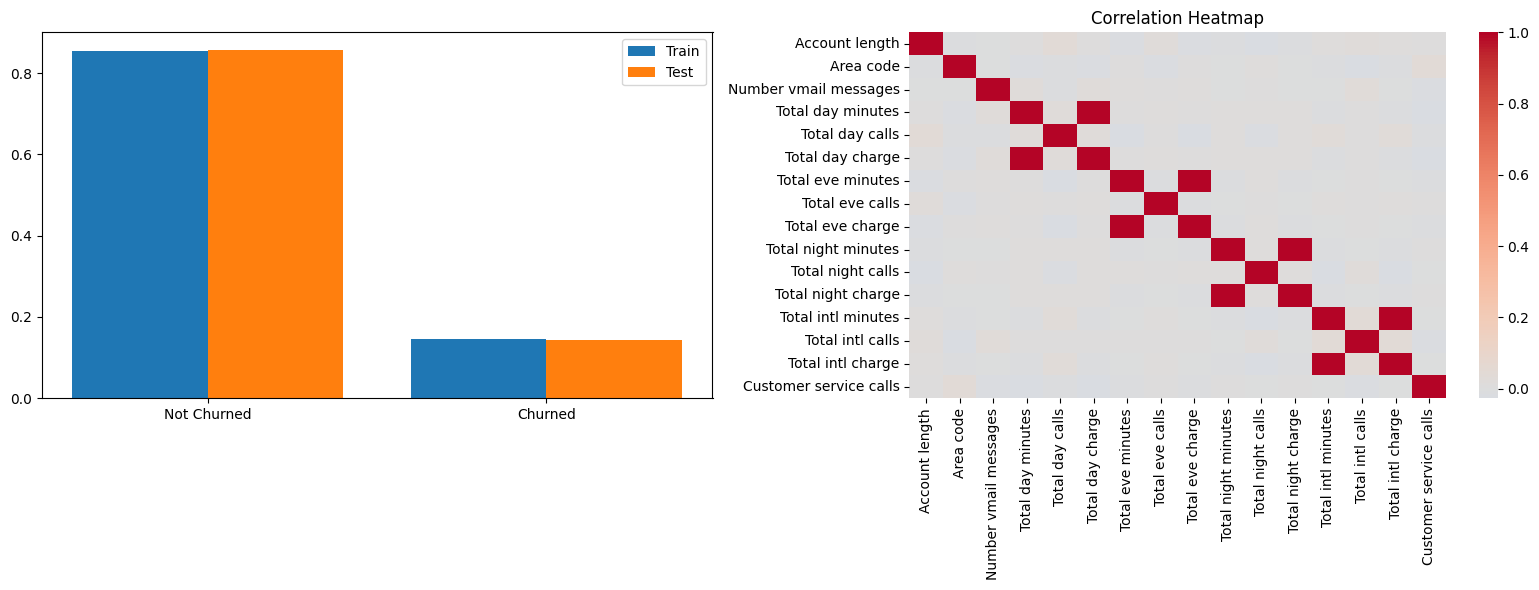


=== EDA Report ===

Training Set - Numerical Features Summary:
       Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.38

In [31]:
if __name__ == "__main__": #For only running when directly used
    train_path = r"data\raw\churn-bigml-80.csv"
    test_path = r"data\raw\churn-bigml-20.csv"
    
    # Loading and exploring the data
    df_train, df_test = load_and_explore_data(train_path, test_path)
    
    # EDA report
    generate_basic_eda_report(df_train, df_test)
    
    # Using example attempt to prepare features for modeling
    X_train, X_test, y_train, y_test = prepare_features(df_train, df_test)